Dataset Link: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/data

## Importing Libraries

In [6]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import librosa
import numpy as np
import tensorflow as tf

y, sr = librosa.load(librosa.ex('trumpet'))
print(y.shape, sr)
print("GPU:", tf.config.list_physical_devices("GPU"))


(117601,) 22050
GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Visualizing Single Audio

In [8]:
random_file_name = "./blues.00000.wav"

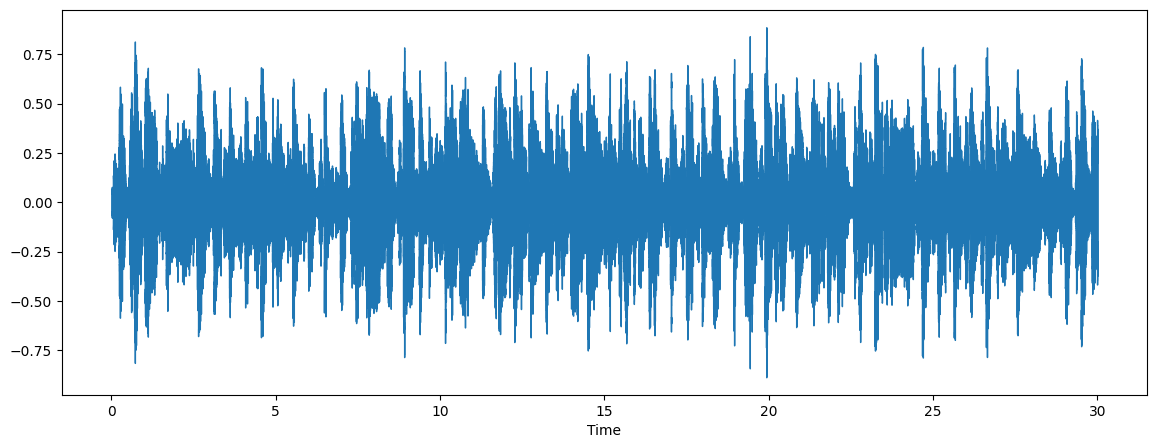

In [9]:
x, sr = librosa.load(random_file_name, sr=44100)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

#### Playing Sound

In [10]:
from IPython.display import Audio
Audio(data=x, rate=sr)

### Doing Visualization on chunks of audio

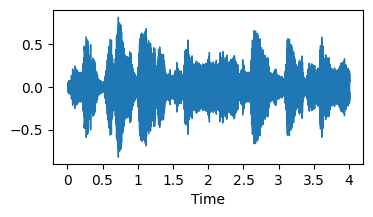

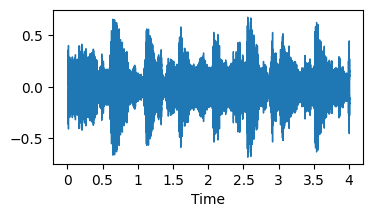

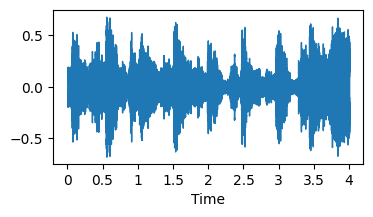

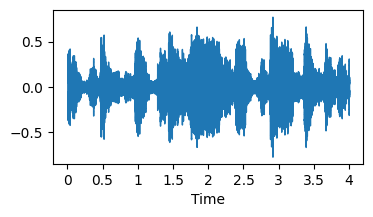

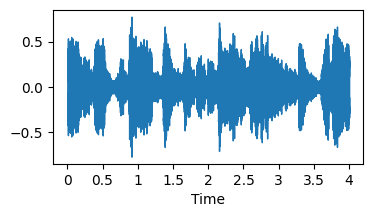

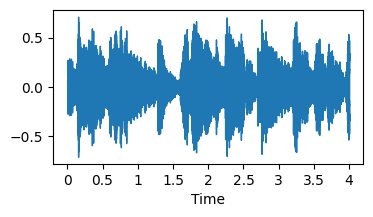

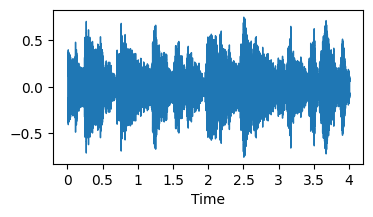

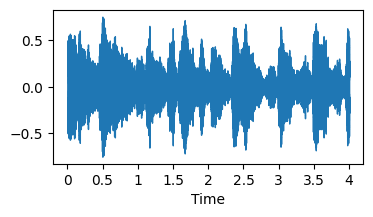

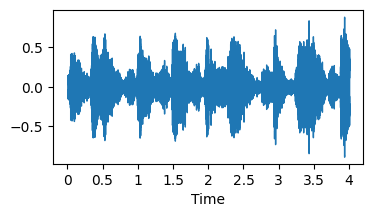

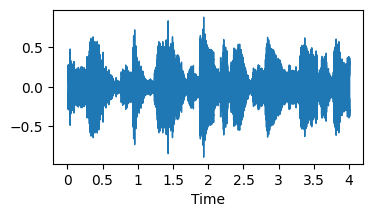

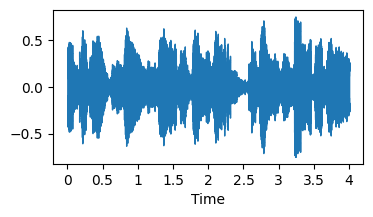

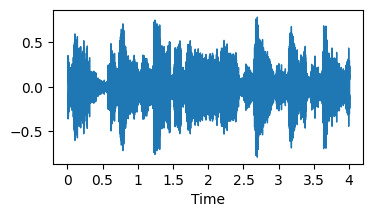

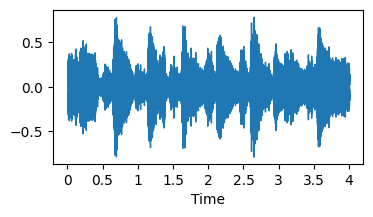

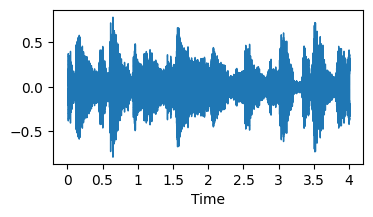

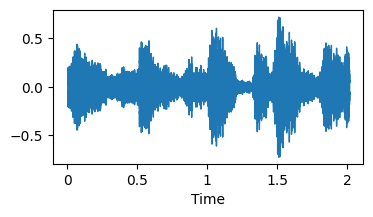

In [11]:
audio_path = "./blues.00000.wav"
y, sr = librosa.load(audio_path, sr=None)  # sr=None to keep the original sampling rate

# Define the duration of each chunk and overlap
chunk_duration = 4  # seconds
overlap_duration = 2  # seconds

# Convert durations to samples
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# Calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# Iterate over each chunk
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples
    
    # Extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()
    

### Melspectrogram Visualization

In [12]:
#Plotting Melspectrogram of Entire audio
def plot_melspectrogram(y,sr):
    # Compute the spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    # Convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    # Visualize the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

In [13]:
def plot_melspectrogram_chunks(y,sr):
    # Define the duration of each chunk and overlap
    chunk_duration = 4  # seconds
    overlap_duration = 2  # seconds
    
    # Convert durations to samples
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    # Calculate the number of chunks
    num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
    
    # Iterate over each chunk
    for i in range(num_chunks):
        # Calculate start and end indices of the chunk
        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples
        
        # Extract the chunk of audio
        chunk = y[start:end]
        
        # Compute the Mel spectrogram for the chunk
        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
        print(mel_spectrogram.shape)
        spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
        # Visualize the spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.tight_layout()
        plt.show()

(128, 173)


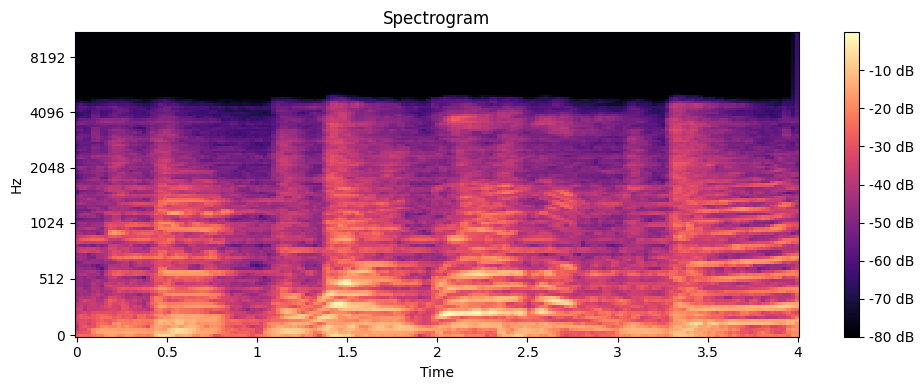

(128, 173)


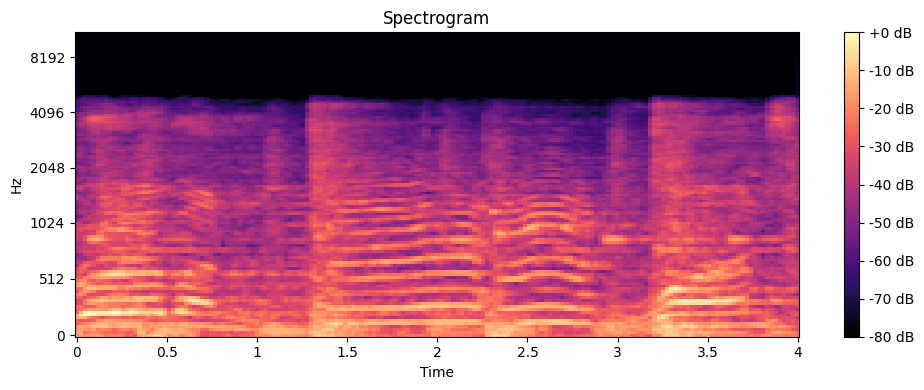

(128, 173)


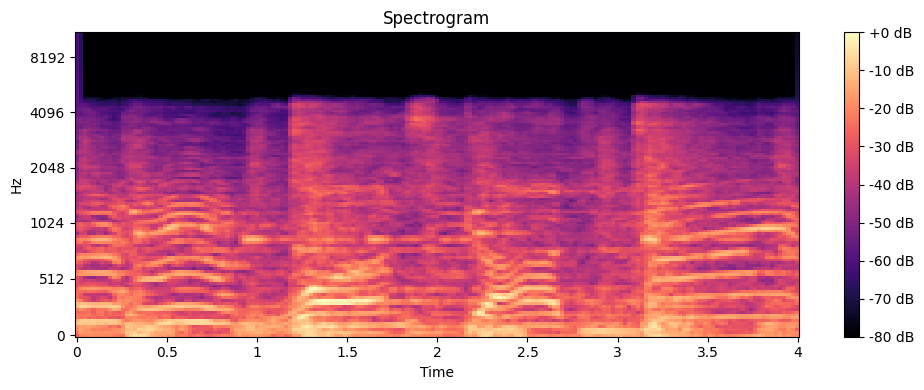

(128, 173)


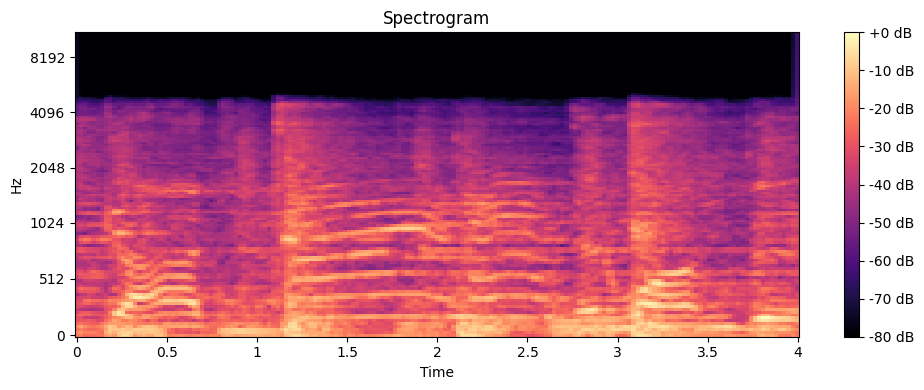

(128, 173)


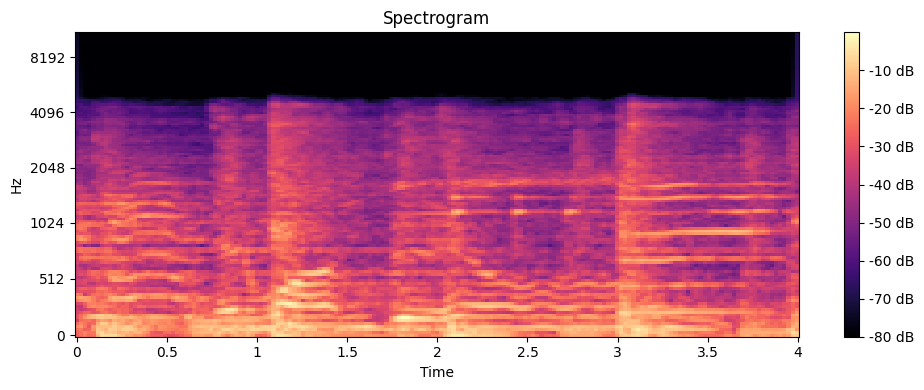

(128, 173)


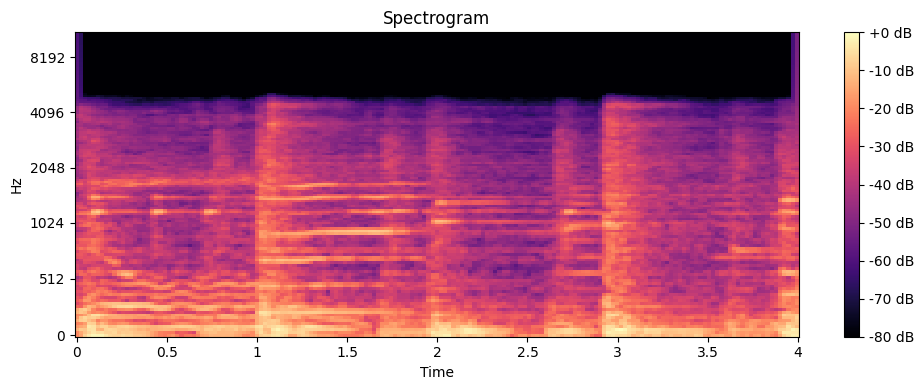

(128, 173)


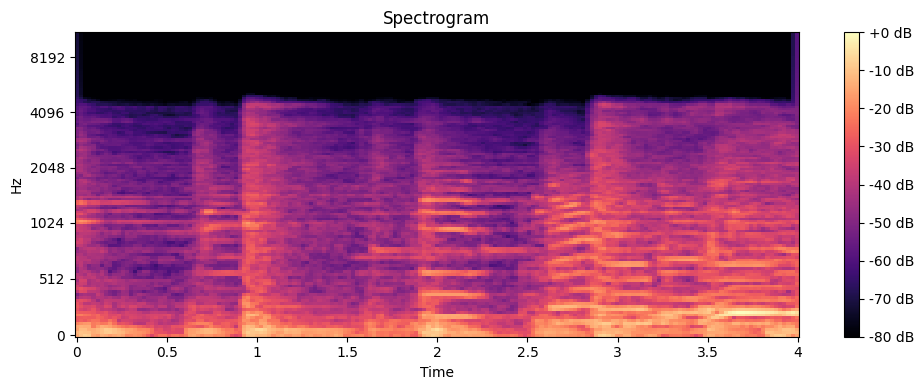

(128, 173)


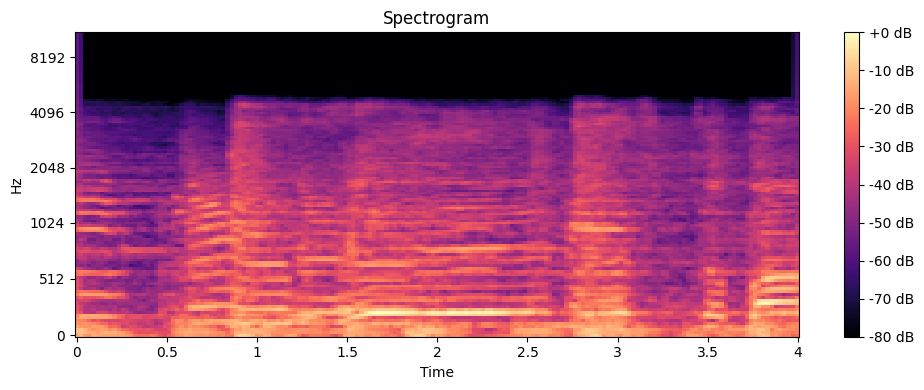

(128, 173)


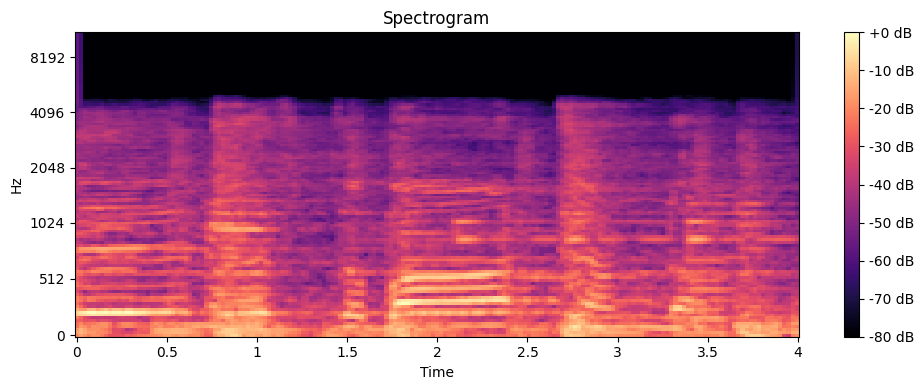

(128, 173)


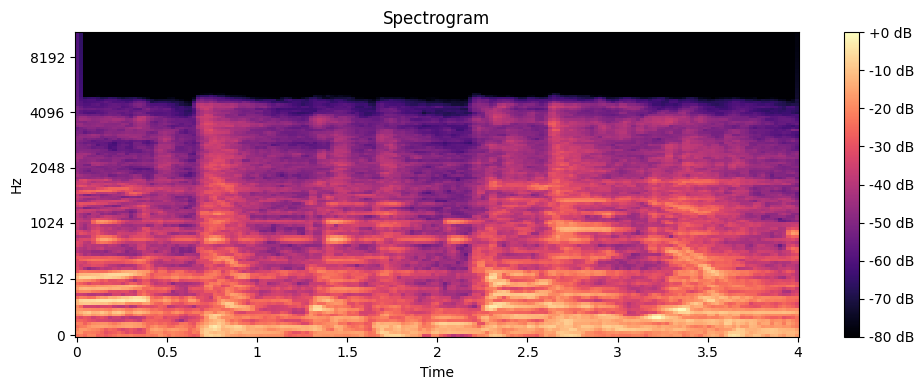

(128, 173)


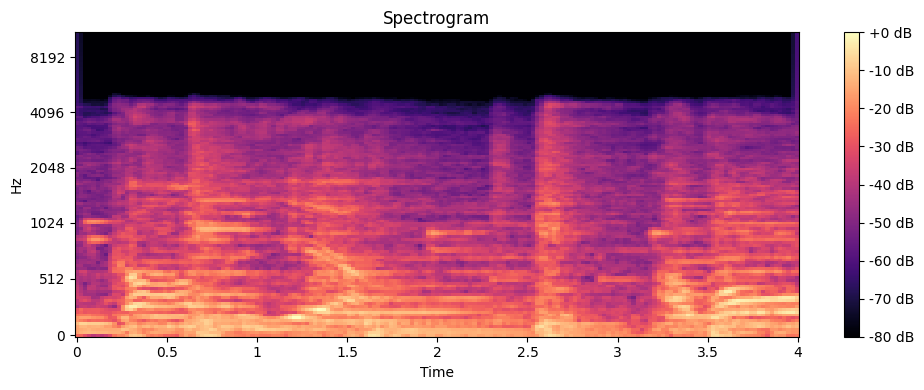

(128, 173)


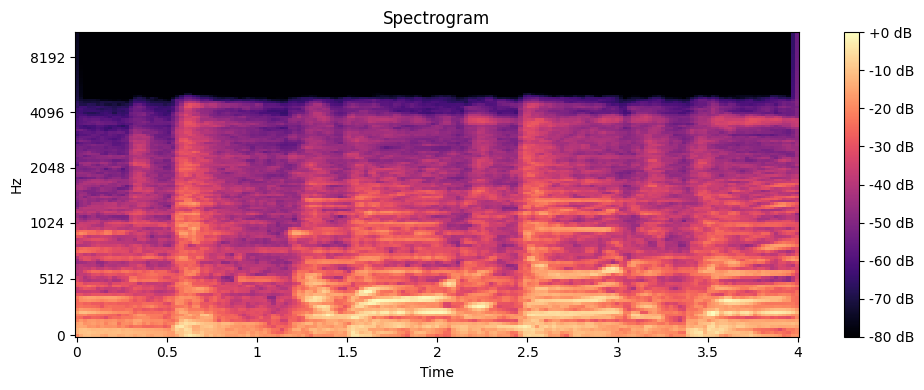

(128, 173)


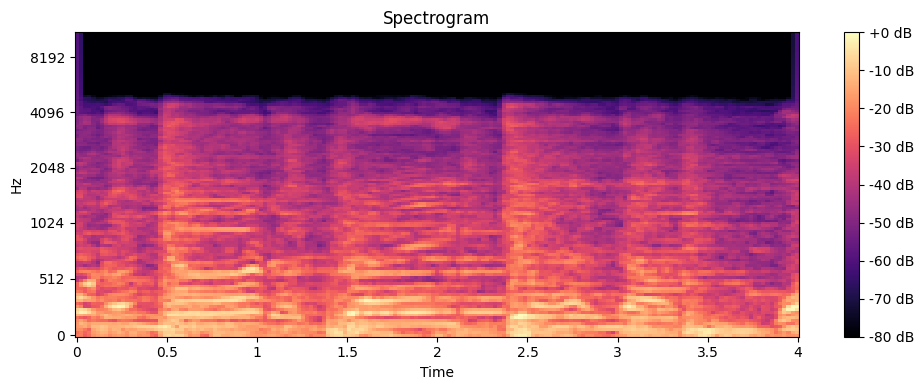

(128, 173)


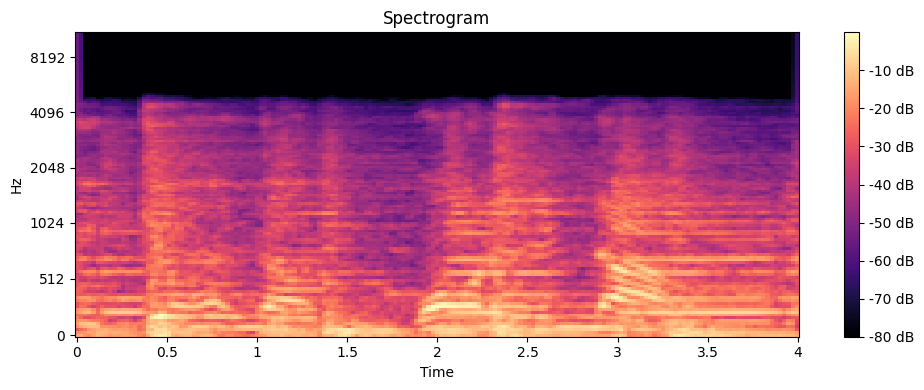

(128, 173)


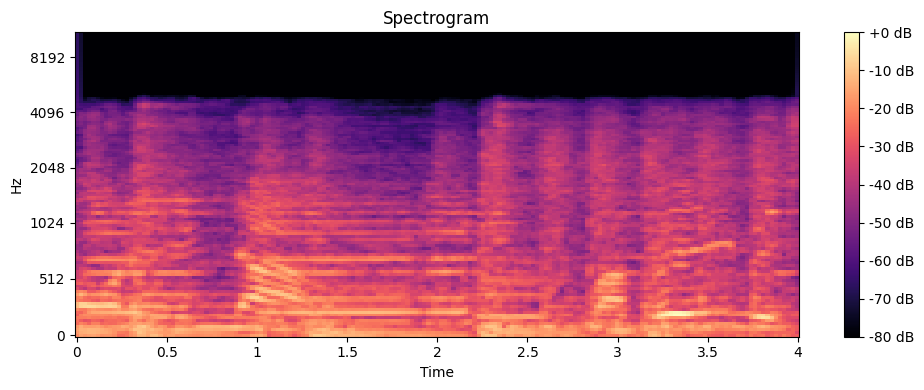

(128, 173)


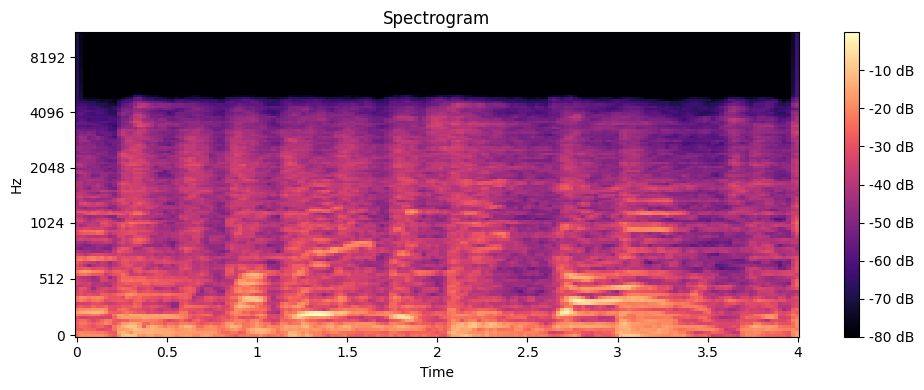

(128, 173)


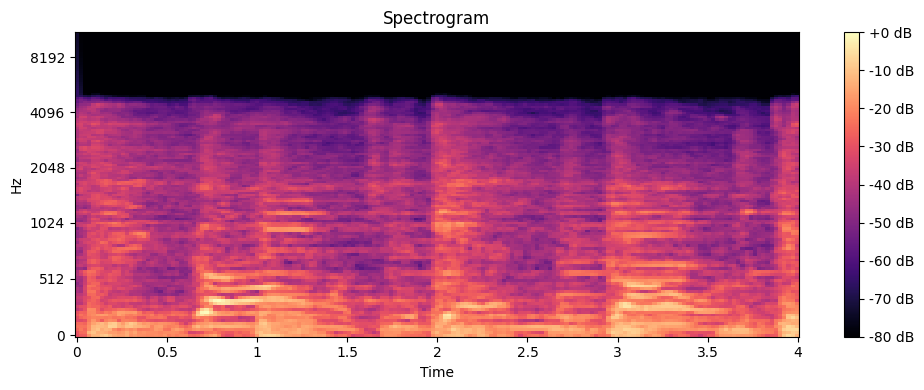

(128, 173)


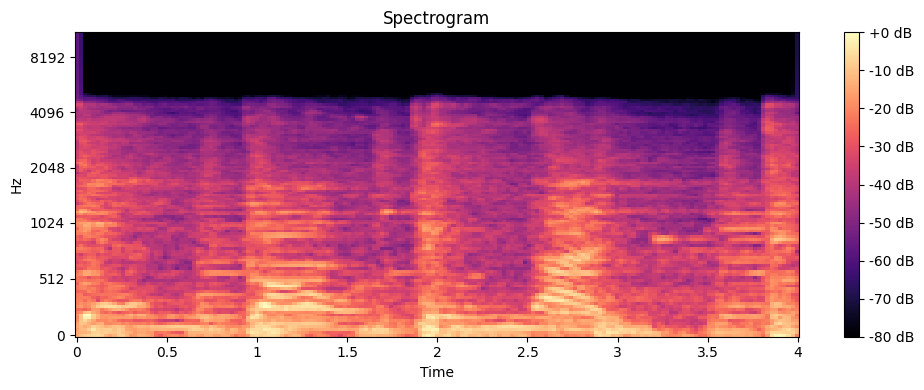

(128, 173)


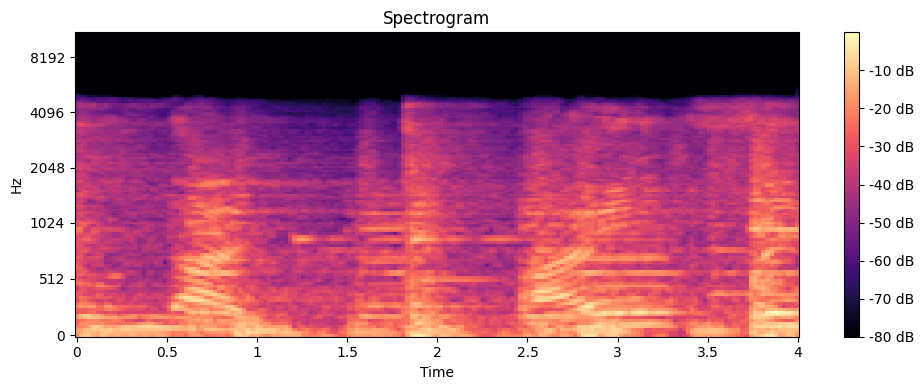

(128, 173)


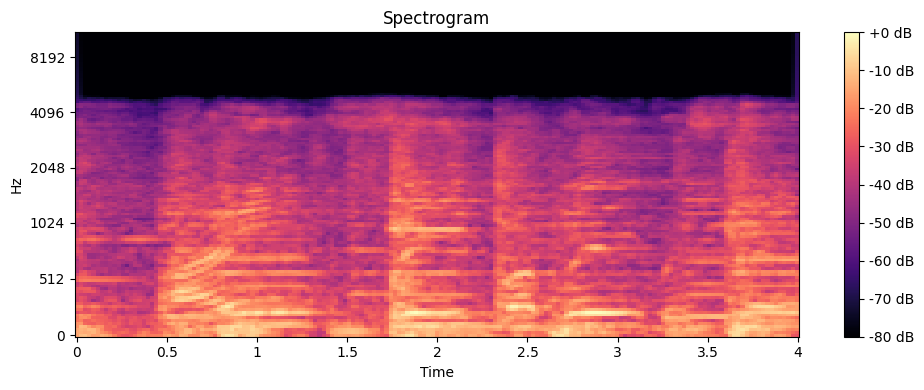

(128, 173)


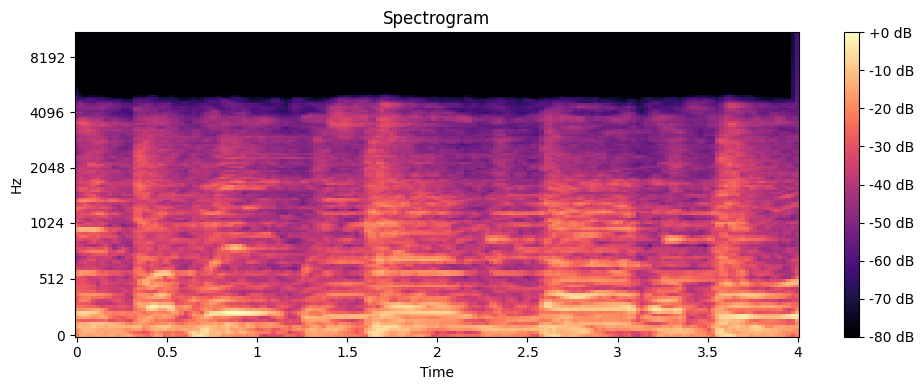

(128, 173)


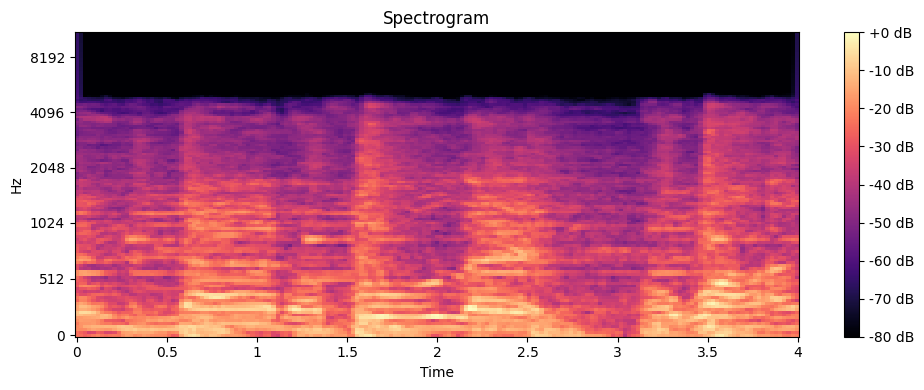

(128, 173)


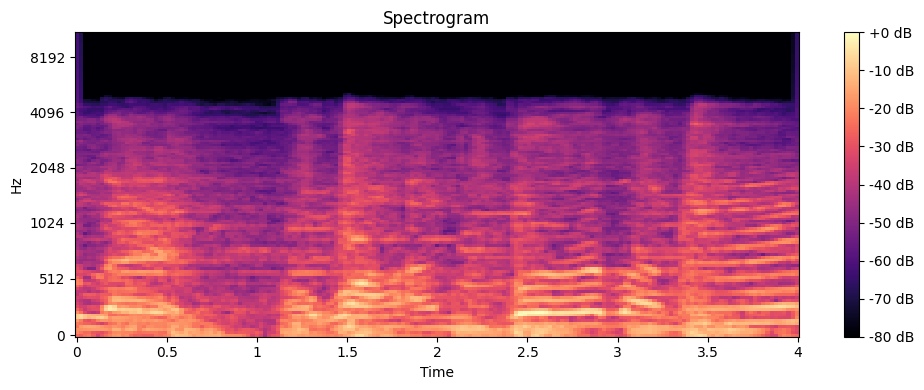

(128, 173)


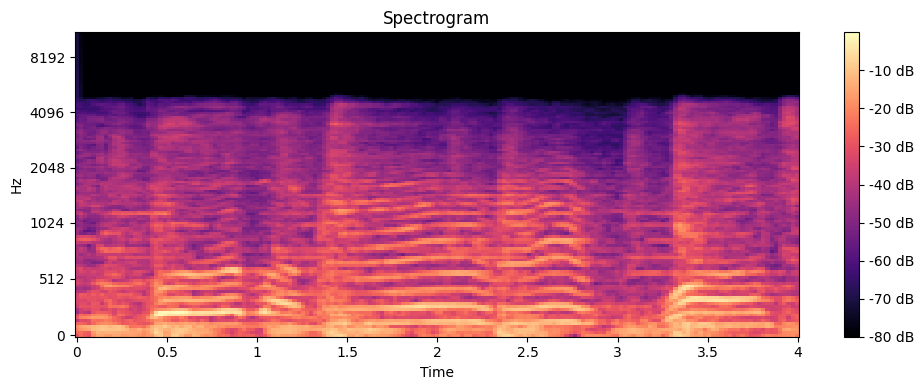

(128, 173)


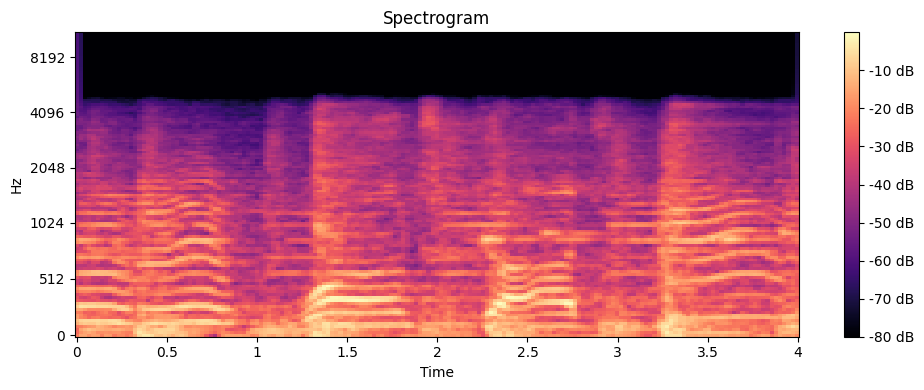

(128, 173)


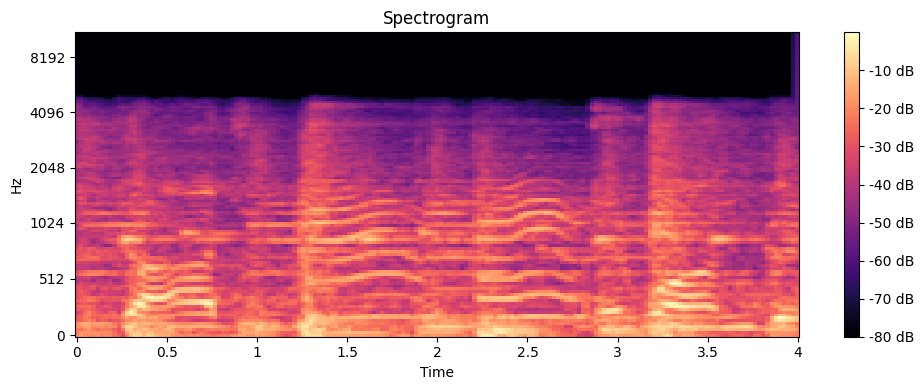

(128, 173)


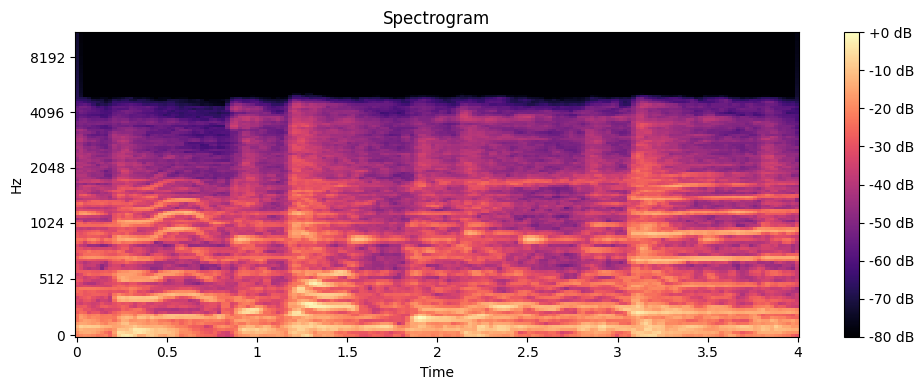

(128, 173)


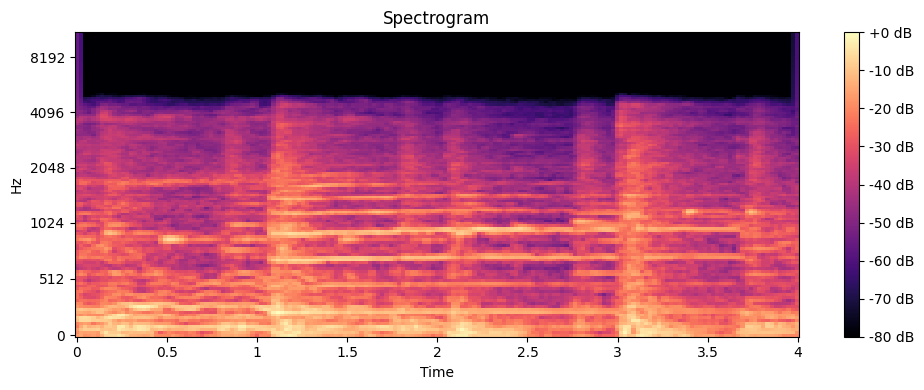

(128, 173)


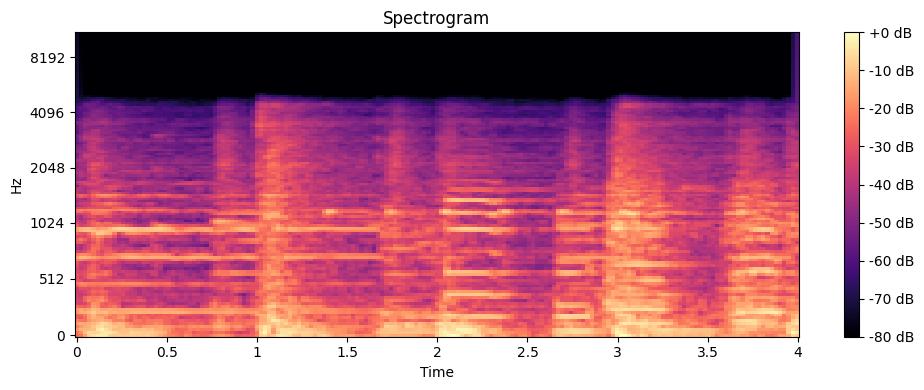

(128, 88)


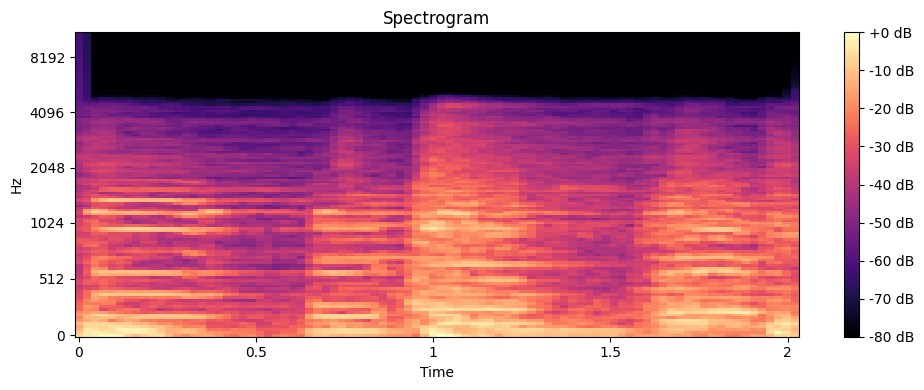

In [14]:
#Spectrogram of Audio chunks
plot_melspectrogram_chunks(y=x,sr=sr)

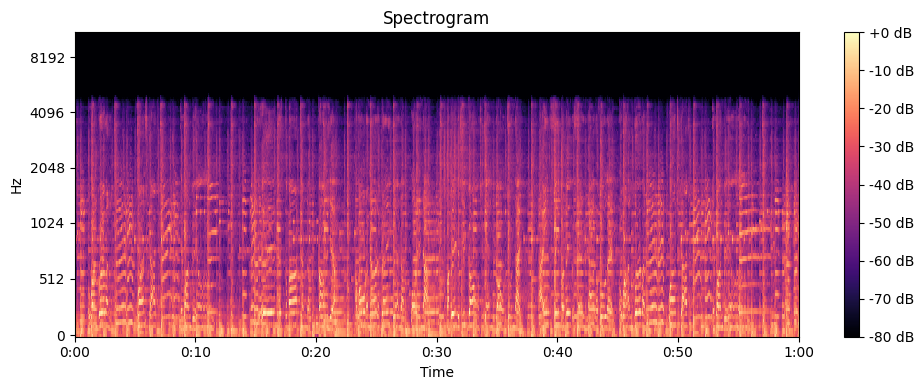

In [15]:
#Spectrogram of Entire audio
plot_melspectrogram(y=x,sr=sr)

### Data Preprocessing

In [16]:
# Define your folder structure
data_dir = 'genres_original'
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [17]:
# Load and preprocess audio data
def load_and_preprocess_data(data_dir, classes, target_shape=(150, 150)):
    data = []
    labels = []

    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                try:
                    audio_data, sample_rate = librosa.load(file_path, sr=None)
                    # Perform preprocessing (e.g., convert to Mel spectrogram and resize)
                    # Define the duration of each chunk and overlap
                    chunk_duration = 4  # seconds
                    overlap_duration = 2  # seconds

                    # Convert durations to samples
                    chunk_samples = chunk_duration * sample_rate
                    overlap_samples = overlap_duration * sample_rate

                    # Calculate the number of chunks
                    num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

                    # Iterate over each chunk
                    for i in range(num_chunks):
                        # Calculate start and end indices of the chunk
                        start = i * (chunk_samples - overlap_samples)
                        end = start + chunk_samples

                        # Extract the chunk of audio
                        chunk = audio_data[start:end]

                        # Compute the Mel spectrogram for the chunk
                        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)

                    #mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
                        mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                        data.append(mel_spectrogram)
                        labels.append(i_class)
                except Exception as e:
                    print(f"Error loading or processing file {file_path}: {e}")
                    continue # Skip to the next file if an error occurs


    return np.array(data), np.array(labels)

In [18]:
# Split data into training and testing sets
data, labels = load_and_preprocess_data(data_dir, classes)
#print("\nData:",data,"\nlabel",labels)

Processing-- blues


2026-01-21 22:10:10.492928: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2026-01-21 22:10:10.493053: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2026-01-21 22:10:10.493081: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2026-01-21 22:10:10.493088: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2348] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
2026-01-21 22:10:11.211759: I external/lo

Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- jazz


/tmp/ipykernel_1325/1228755909.py:13: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sample_rate = librosa.load(file_path, sr=None)
/home/ayush/miniconda3/envs/tensorflow_gpu/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading or processing file genres_original/jazz/jazz.00054.wav: 
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [19]:
data.shape

(14975, 150, 150, 1)

In [20]:
labels.shape

(14975,)

In [21]:
labels

array([0, 0, 0, ..., 9, 9, 9])

In [22]:
labels = to_categorical(labels, num_classes=len(classes))  # Convert labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [23]:
labels.shape

(14975, 10)

In [24]:
data.shape

(14975, 150, 150, 1)

### Splitting Dataset into Training and Test set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

## Building Model

In [26]:
model = tf.keras.models.Sequential()

In [27]:
X_train[0].shape

(150, 150, 1)

In [28]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [29]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [30]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [31]:
model.add(tf.keras.layers.Dropout(0.3))

In [32]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [33]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [34]:
model.add(Dropout(0.3))

In [35]:
model.add(Flatten())

In [36]:
model.add(Dense(units=1200,activation='relu'))

In [37]:
model.add(Dropout(0.45))

In [38]:
#Output Layer
model.add(Dense(units=len(classes),activation='softmax'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                   

In [40]:
# Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [41]:
X_train.shape,y_train.shape

((11980, 150, 150, 1), (11980, 10))

In [42]:
# Train the model
training_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30


2026-01-21 22:13:07.568388: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2026-01-21 22:13:07.705673: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2026-01-21 22:13:07.836225: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2026-01-21 22:13:08.675806: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2026-01-21 22:13:09.107918: I external/local_xla/xla/service/service.cc:168] XLA service 0x73f3d4f199a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-21 22:13:09.107939: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 50

375/375 [==============================] - 25s 43ms/step - loss: 1.9855 - accuracy: 0.2772 - val_loss: 1.5778 - val_accuracy: 0.4417
Epoch 2/30
375/375 [==============================] - 12s 32ms/step - loss: 1.4150 - accuracy: 0.5036 - val_loss: 1.1551 - val_accuracy: 0.6017
Epoch 3/30
375/375 [==============================] - 16s 42ms/step - loss: 1.1313 - accuracy: 0.6095 - val_loss: 1.1211 - val_accuracy: 0.6023
Epoch 4/30
375/375 [==============================] - 12s 32ms/step - loss: 0.9527 - accuracy: 0.6783 - val_loss: 0.8458 - val_accuracy: 0.7125
Epoch 5/30
375/375 [==============================] - 16s 41ms/step - loss: 0.8124 - accuracy: 0.7246 - val_loss: 0.7829 - val_accuracy: 0.7342
Epoch 6/30
375/375 [==============================] - 12s 32ms/step - loss: 0.6948 - accuracy: 0.7638 - val_loss: 0.6815 - val_accuracy: 0.7703
Epoch 7/30
375/375 [==============================] - 12s 32ms/step - loss: 0.5944 - accuracy: 0.7959 - val_loss: 0.6441 - val_accuracy: 0.7910
Epo

In [ ]:
model.save("Trained_model.keras") #Mac
model.save("Trained_model.h5") #Windows

/home/ayush/miniconda3/envs/tensorflow_gpu/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_Trained_model.keras')`.
  saving_api.save_model(


In [44]:
training_history.history

{'loss': [1.9855045080184937,
  1.4149751663208008,
  1.1313176155090332,
  0.9526560306549072,
  0.8124155402183533,
  0.6948494911193848,
  0.5944244265556335,
  0.501573920249939,
  0.4169277846813202,
  0.37853074073791504,
  0.29086950421333313,
  0.2579585611820221,
  0.23316766321659088,
  0.20537398755550385,
  0.1818813979625702,
  0.1524045318365097,
  0.13218937814235687,
  0.12798500061035156,
  0.12297475337982178,
  0.09328261762857437,
  0.09863785654306412,
  0.09257016330957413,
  0.06892210245132446,
  0.08278128504753113,
  0.08262306451797485,
  0.07003578543663025,
  0.05485684052109718,
  0.06303419917821884,
  0.04531971365213394,
  0.05875907093286514],
 'accuracy': [0.2772120237350464,
  0.5035893321037292,
  0.6095158457756042,
  0.6782971620559692,
  0.7246243953704834,
  0.7637729644775391,
  0.7959098219871521,
  0.832136869430542,
  0.8587645888328552,
  0.8731218576431274,
  0.9035058617591858,
  0.9146077036857605,
  0.9222036600112915,
  0.9299666285514

In [45]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

## Model Evaluation

In [46]:
##Model Evaluation on Training set
train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(train_accuracy[1])

0.9917362332344055


In [47]:
##Model Evaluation on Test set
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8941569328308105


## Accuracy and Loss Visualization

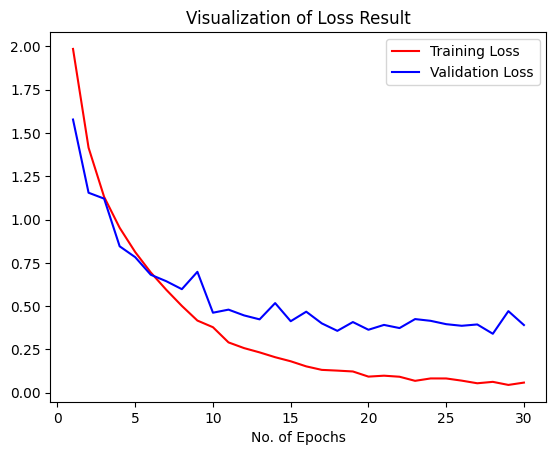

In [48]:
#Visualization of Loss
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['loss'],color='red',label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

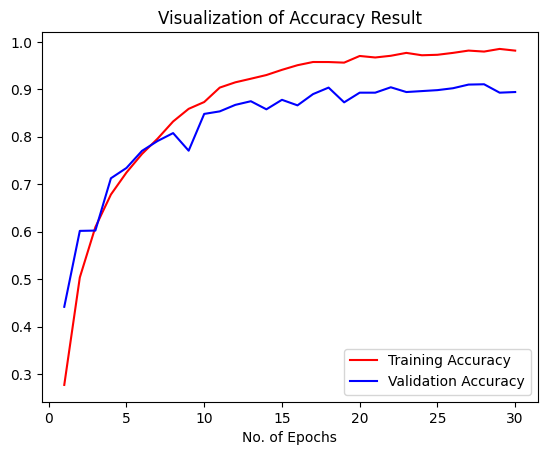

In [49]:
#Accuracy Visualization
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Precision, Recall, Confusion Metrics calculation

In [50]:
y_pred = model.predict(X_test)
y_pred

94/94 [==============================] - 1s 8ms/step


array([[6.0015399e-02, 2.5782204e-04, 8.8356418e-04, ..., 9.2754185e-01,
        7.0981376e-05, 5.7446053e-03],
       [5.6989889e-13, 9.8658886e-19, 4.9295564e-15, ..., 2.6793595e-20,
        1.8822298e-16, 7.5424680e-08],
       [8.7248875e-11, 2.9095915e-10, 2.7286810e-11, ..., 2.5491877e-09,
        1.3157149e-10, 1.8847908e-03],
       ...,
       [1.0000000e+00, 2.0882663e-18, 3.4912753e-11, ..., 1.4551564e-17,
        1.6810350e-14, 9.1192002e-12],
       [1.1326078e-03, 9.6115166e-01, 2.7201350e-03, ..., 5.1796099e-04,
        1.5446553e-02, 8.8624852e-03],
       [4.2589159e-05, 1.1469230e-06, 3.4724508e-04, ..., 1.3387983e-03,
        1.6363310e-02, 2.4146613e-01]], dtype=float32)

In [51]:
y_pred.shape

(2995, 10)

In [52]:
y_test.shape

(2995, 10)

In [53]:
predicted_categories = np.argmax(y_pred, axis=1)
predicted_categories

array([7, 6, 6, ..., 0, 1, 4])

In [54]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
true_categories = np.argmax(y_test, axis=1)
true_categories

array([7, 6, 6, ..., 0, 1, 4])

In [56]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [57]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.90      0.91      0.90       302
   classical       0.86      0.99      0.92       298
     country       0.88      0.79      0.83       317
       disco       0.92      0.88      0.90       312
      hiphop       0.90      0.93      0.92       277
        jazz       0.94      0.89      0.92       311
       metal       0.91      0.99      0.95       302
         pop       0.96      0.83      0.89       289
      reggae       0.96      0.89      0.92       296
        rock       0.76      0.85      0.80       291

    accuracy                           0.89      2995
   macro avg       0.90      0.89      0.89      2995
weighted avg       0.90      0.89      0.89      2995



## Confusion Matrix Visualization

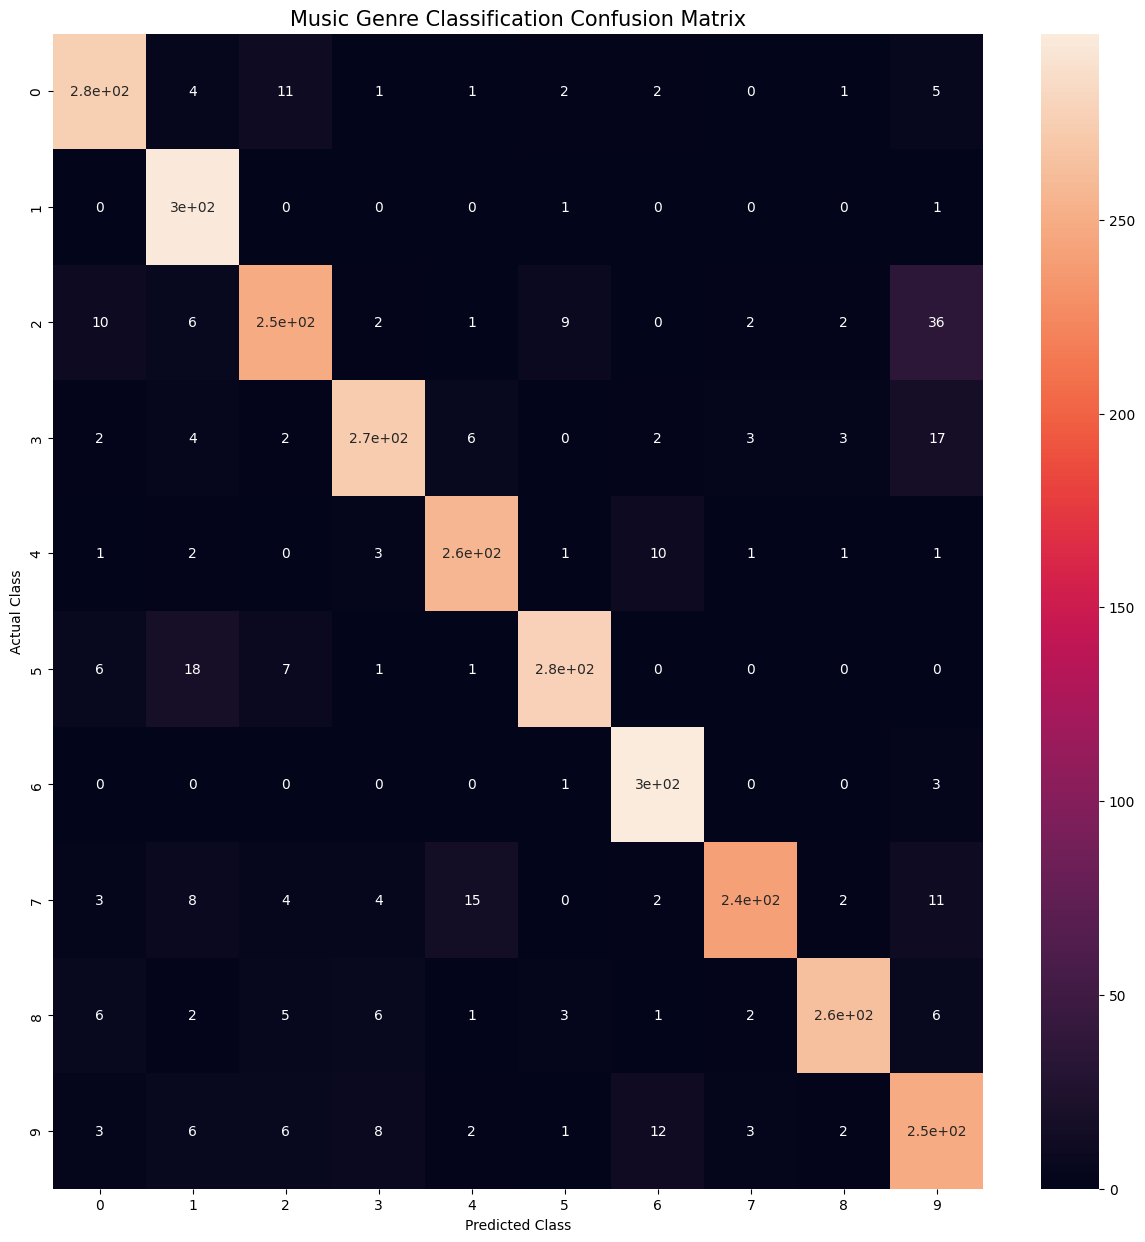

In [58]:
plt.figure(figsize=(15, 15))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 10)
plt.ylabel('Actual Class',fontsize = 10)
plt.title('Music Genre Classification Confusion Matrix',fontsize = 15)
plt.show()

In [59]:
import tensorflow as tf

#Check if TensorFlow is using the GPU
if tf.config.list_physical_devices('GPU'):
    print("TensorFlow is using the GPU!")
    
    #Get list of available GPUs
    gpus = tf.config.list_physical_devices('GPU')
    print("Available GPUs:", gpus)
    
    #Get details of each GPU
    for gpu in gpus:
        details = tf.config.experimental.get_device_details(gpu)
        print("GPU Details:", details)
else:
    print("TensorFlow is using the CPU.")

TensorFlow is using the GPU!
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU Details: {'compute_capability': (12, 0), 'device_name': 'NVIDIA GeForce RTX 5070 Ti Laptop GPU'}


2026-01-21 22:23:14.420124: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
